In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load the datasets

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings 
warnings.filterwarnings('ignore')

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
y_train[0]

9

In [19]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
def show(index):
    plt.figure(figsize = (3, 5))
    plt.imshow(X_train[index])
    print(classes[y_train[index]])
    plt.axis('off')

Bag


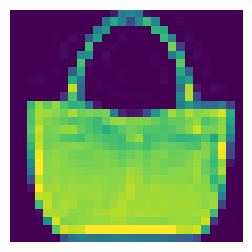

In [29]:
show(100)

Dress


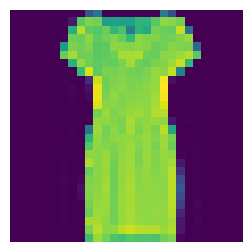

In [31]:
show(20)

Pullover


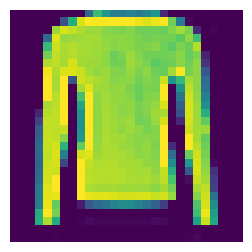

In [32]:
show(1001)

Remove null values and clean the data if any

## Normalization

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build the model

In [33]:
X_train.shape

(60000, 28, 28)

while training the a ANN model flatten the data because the ANN model only takes one dimensional data

In [46]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (28 ,28)),
    
    keras.layers.Dense(748,activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [47]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7606 - loss: 0.6683
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8490 - loss: 0.4136
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8592 - loss: 0.3856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8705 - loss: 0.3562
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8776 - loss: 0.3336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8809 - loss: 0.3300
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8828 - loss: 0.3182
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8855 - loss: 0.3116
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8880 - loss: 0.3083
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8889 - loss: 0.2983


In [49]:
_, acc = model.evaluate(X_test, y_test)
acc * 100

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8761 - loss: 0.3410


87.91999816894531

In [50]:
pred = model.predict(X_test)
y_pred = [np.argmax(value) for value in pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [54]:
print(y_test[9])
print(y_pred[9])

7
7


In [57]:
def check(index):
    plt.figure(figsize = (3, 5))
    plt.imshow(X_test[index])
    print(classes[y_pred[index]])
    plt.axis('off')

Sandal


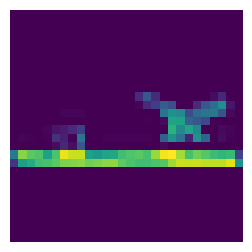

In [59]:
check(90) # Therefore it is predicting correctly

Ankle boot


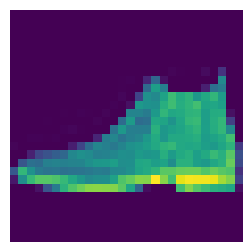

In [60]:
check(0)

In [63]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test) 
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8926 - loss: 0.2893 - val_accuracy: 0.8815 - val_loss: 0.3434
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8941 - loss: 0.2836 - val_accuracy: 0.8822 - val_loss: 0.3454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8957 - loss: 0.2768 - val_accuracy: 0.8834 - val_loss: 0.3462
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8975 - loss: 0.2742 - val_accuracy: 0.8833 - val_loss: 0.3304
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8978 - loss: 0.2748 - val_accuracy: 0.8884 - val_loss: 0.3336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9012 - loss: 0.2648 - val_accuracy: 0.8802 - val_loss: 0.3484
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9035 - loss: 0.2650 - val_accuracy: 0.8808 - val_loss: 0.3444
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9046 -

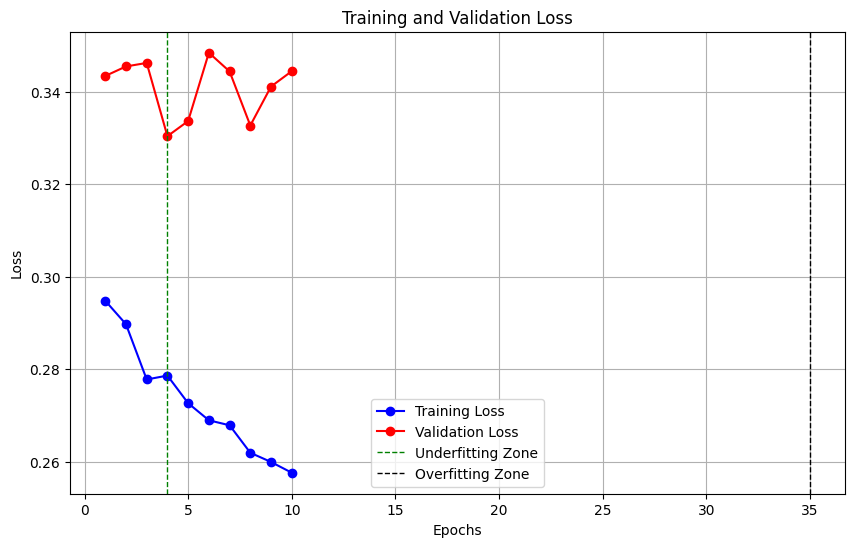

In [66]:
# Whether the data is overfitting or not

training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize = (10, 6))
plt.plot(epochs, training_loss, 'bo-', label = "Training Loss")
plt.plot(epochs, val_loss, 'ro-', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.axvline(x=4, color='g', linestyle='--', linewidth=1, label = "Underfitting Zone")
plt.axvline(x=35, color='k', linestyle='--', linewidth=1, label = "Overfitting Zone")

plt.legend()
plt.grid(True)
plt.show()

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.77      0.79      1000
           3       0.88      0.87      0.88      1000
           4       0.75      0.84      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.68      0.73      0.70      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(0.5, 1.0, 'Confusion Matrix')

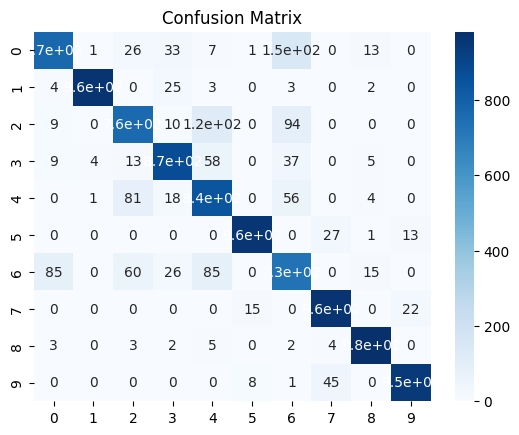

In [62]:
sns.heatmap(cm, cmap="Blues", annot=True)
plt.title("Confusion Matrix")

## Building CNN model

In [70]:
model = keras.Sequential([
    
    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1),activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [71]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test) 
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.6919 - loss: 0.8470 - val_accuracy: 0.8295 - val_loss: 0.4655
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8411 - loss: 0.4354 - val_accuracy: 0.8565 - val_loss: 0.3900
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8655 - loss: 0.3629 - val_accuracy: 0.8625 - val_loss: 0.3664
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8857 - loss: 0.3169 - val_accuracy: 0.8673 - val_loss: 0.3655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8899 - loss: 0.2989 - val_accuracy: 0.8831 - val_loss: 0.3197
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9011 - loss: 0.2710 - val_accuracy: 0.8823 - val_loss: 0.3241
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9083 - loss: 0.2484 - val_accuracy: 0.8872 - val_loss: 0.3206
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9140 -

In [72]:
_, acc = model.evaluate(X_test, y_test)
acc * 100

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8882 - loss: 0.3255


88.88000249862671

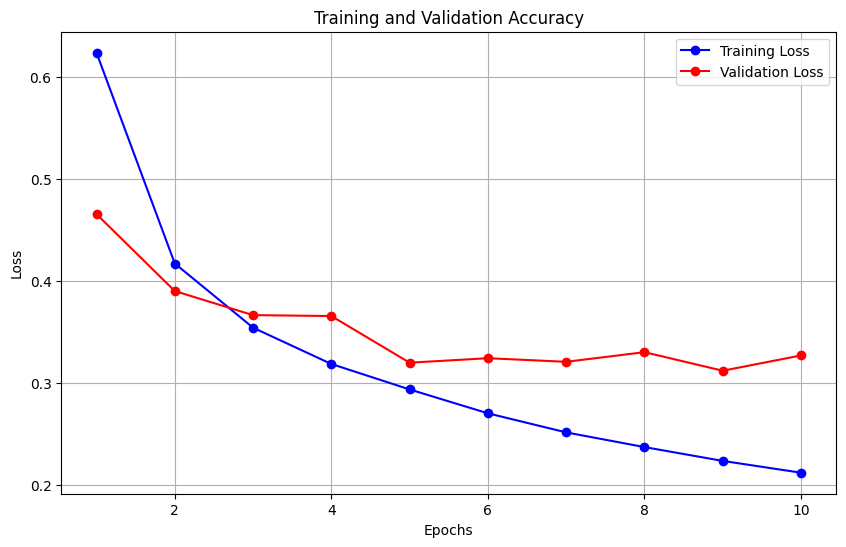

In [73]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.77      0.79      1000
           3       0.88      0.87      0.88      1000
           4       0.75      0.84      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.68      0.73      0.70      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(0.5, 1.0, 'Confusion Matrix')

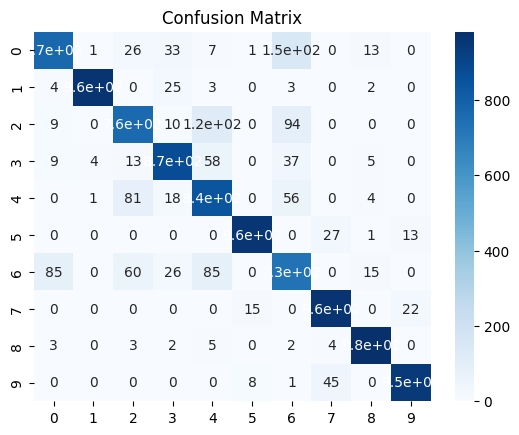

In [75]:
sns.heatmap(cm, cmap="Blues", annot=True)
plt.title("Confusion Matrix")

In [76]:
pred = model.predict(X_test)
y_pred = [np.argmax(value) for value in pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [77]:
def check(index):
    plt.figure(figsize = (3, 5))
    plt.imshow(X_test[index])
    print(classes[y_pred[index]])
    plt.axis('off')

Trouser


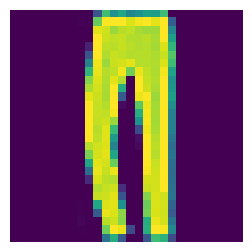

In [78]:
check(2)

Sneaker


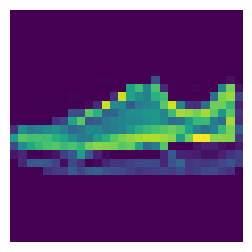

In [79]:
check(9)

The model is prettty good and giving good results